## Bibliotecas

In [16]:
import pandas as pd
import numpy as np

## Importamos datos

In [18]:
books = pd.read_csv("books_data/books.csv", sep=';', encoding="latin-1", error_bad_lines=False)
users = pd.read_csv("books_data/users.csv", sep=';', encoding="latin-1", error_bad_lines=False)
ratings = pd.read_csv("books_data/ratings.csv", sep=';', encoding="latin-1", error_bad_lines=False)

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/IPython/core/intera

In [113]:
books.shape

(271360, 5)

In [114]:
users.shape

(278858, 3)

In [115]:
ratings.shape

(526356, 3)

In [ ]:
#Se ajustan los nombres de las columnas

In [25]:
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]
books.rename(columns = {'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year', 'Publisher':'publisher'}, inplace=True)
users.rename(columns = {'User-ID':'user_id', 'Location':'location', 'Age':'age'}, inplace=True)
ratings.rename(columns = {'User-ID':'user_id', 'Book-Rating':'rating'}, inplace=True)

In [26]:
books.columns

Index(['ISBN', 'title', 'author', 'year', 'publisher'], dtype='object')

In [27]:
ratings.columns

Index(['user_id', 'ISBN', 'rating'], dtype='object')

## 🦎 Filtro colaborativo

In [ ]:
#Se elije un filtro colaborativo porque se busca que entre dos usuarios se hagan recomendaciones. 
#Se eliminan usuarios cuya relevancia sea baja. Al ser el data set tan grande podemos eliminar aquellos 

In [28]:
ratings['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

In [ ]:
# Extraer a los usuarios con pocas lecturas, menos de 200

In [29]:
x = ratings['user_id'].value_counts() > 200
y = x[x].index  #user_ids
print(y.shape)
ratings = ratings[ratings['user_id'].isin(y)]

(899,)


In [32]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [33]:
ratings.shape   #Han bajado de 1149780

(526356, 3)

In [36]:
#Juntamos las tablas de valoración y de títulos
rating_with_books = ratings.merge(books, on='ISBN')  #Se juntan por el isbn que es la referencia
rating_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc


In [38]:
rating_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc


In [44]:
rating_with_books.info()    #Es que está limplio que da gusto 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487671 entries, 0 to 487670
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    487671 non-null  int64 
 1   ISBN       487671 non-null  object
 2   rating     487671 non-null  int64 
 3   title      487671 non-null  object
 4   author     487671 non-null  object
 5   year       487671 non-null  object
 6   publisher  487669 non-null  object
dtypes: int64(2), object(5)
memory usage: 29.8+ MB


In [56]:
rating_with_books.rating    #puntuaciones

0         10
1          0
2          6
3         10
4          0
          ..
487666     0
487667     0
487668    10
487669     0
487670     0
Name: rating, Length: 487671, dtype: int64

In [78]:
rating_with_books.rating.count('0')

/var/folders/bp/5cqvvvwn7p14588p725frs740000gn/T/ipykernel_90374/3902298491.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. ser.count(level=1) should use ser.groupby(level=1).count().
  rating_with_books.rating.count('0')


ValueError: Series.count level is only valid with a MultiIndex

In [67]:
len(rating_with_books.title.unique())

160269

In [71]:
len(rating_with_books.rating.unique()) 

11

In [42]:
number_rating = rating_with_books.groupby('title')['rating'].count()   #juntamos por título

In [43]:
number_rating

title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    2
 Always Have Popsicles                                                                                        1
 Apple Magic (The Collector's series)                                                                         1
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   1
 Clifford Visita El Hospital (Clifford El Gran Perro Colorado)                                                1
                                                                                                             ..
Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.                                                           3
Ã?Â?lpiraten.                                                                                                 1
Ã?Â?rger mit Produkt X. Roman.                                                                    

In [73]:
#cambiaa índice
number_rating = rating_with_books.groupby('title')['rating'].count().reset_index()   


In [74]:
#Se va a buscar que no haya gente que haya votado dos veces.
#Además el número de votos tiene que ser mayor o igual que 50 para que sea relevante

number_rating.rename(columns= {'rating':'number_of_ratings'}, inplace=True)
final_rating = rating_with_books.merge(number_rating, on='title')

final_rating = final_rating[final_rating['number_of_ratings'] >= 50]
final_rating.drop_duplicates(['user_id','title'], inplace=True)   #quitar gente que haya votado 2 veces el mismo libro



In [75]:
final_rating.shape

(59850, 8)

In [76]:
#con esto se cambia el índice, ahora va a ser por título. Las columnas van a ser los usuarios

book_pivot = final_rating.pivot_table(columns='user_id', index='title', values="rating")
book_pivot.fillna(0, inplace=True)

## Modelado

In [82]:
#Como hay muchos ceros, no todo el mundo ha votado todo
#La matriz para poder hacer esto s llama Spars

In [83]:
from scipy.sparse import csr_matrix


In [84]:
book_sparse = csr_matrix(book_pivot)

In [86]:
from sklearn.neighbors import NearestNeighbors


In [87]:
model = NearestNeighbors(algorithm='brute')   #El bruto le indica que va a medir la distancia de cada uno de los puntos
model.fit(book_sparse)



NearestNeighbors(algorithm='brute')

In [ ]:
#ahora hay que pasarle un valor para que prediga los vecinos

In [101]:
distances, suggestions = model.kneighbors(book_pivot.iloc[234, :].values.reshape(1, -1))

In [102]:
for i in range(len(suggestions)):
    print(book_pivot.index[suggestions[i]])

Index(['H Is for Homicide (Kinsey Millhone Mysteries (Paperback))',
       'Shadow Prey', 'The Clinic (Alex Delaware Novels (Paperback))',
       'E Is for Evidence: A Kinsey Millhone Mystery (Kinsey Millhone Mysteries (Paperback))',
       'I Is for Innocent'],
      dtype='object', name='title')


In [ ]:
#Lo malo es que esto va por book ID, por número, no por título

In [104]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
distances, suggestions = model.kneighbors(book_pivot.iloc[741, :].values.reshape(1, -1))



In [143]:
#84 Charing Cross Road
distances, suggestions = model.kneighbors(book_pivot.loc['84 Charing Cross Road'].values.reshape(1, -1))   #mejor que por índice por loc, no por iloc (joder)

#lo malo es que tienen que ser títulos exactos ☹️


In [141]:
for i in range(len(suggestions)):
    print(book_pivot.index[suggestions[i]])  #Va a hacer tantas recomendaciones como filas tenga, hasta el elemento 741, índice 742 
    
    

Index(['84 Charing Cross Road', 'Exclusive', 'Jacob Have I Loved', 'Alaska',
       'No Safe Place'],
      dtype='object', name='title')


## 🦖 Por contenido - sinopsis

In [ ]:
#~creía que sí, pero no~ Hace falta gensim que es: library for topic modelling, document indexing and similarity retrieval with large corpora. 
#Target audience is the natural language processing (NLP)



In [116]:
books.columns

Index(['ISBN', 'title', 'author', 'year', 'publisher'], dtype='object')

In [117]:

users.columns


Index(['user_id', 'location', 'age'], dtype='object')

In [119]:
ratings.columns

Index(['user_id', 'ISBN', 'rating'], dtype='object')

In [126]:
#No tenemos sinopsis para recomendar por contenido, por eso necesitamos trabajar con otro dataset

In [135]:
libros = pd.read_csv('books_data/data_greads.csv', sep=',', encoding='utf-8', error_bad_lines=False)

/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [136]:
libros.shape   

(2382, 8)

In [192]:
libros.head()    #En latin1 no lee los acentos. con utf8 sí ^^

,Unnamed: 0,Desc,Unnamed: 0.1,author,genre,image_link,rating,title
0,0,We know that power is shifting: From West to E...,0.0,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,1,Following the success of The Accidental Billio...,1.0,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,2,How to tap the power of social software and ne...,2.0,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...
3,3,William J. Bernstein is an American financial ...,3.0,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing
4,4,Amazing book. And I joined Steve Jobs and many...,4.0,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony


In [243]:
libros[1700:1715]

,Unnamed: 0,Desc,Unnamed: 0.1,author,genre,image_link,rating,title
1700,1769,Katherine V thought boys were grossKatherine X...,NaN,John Green,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,3.59,An Abundance of Katherines
1701,1770,It is now six years since the secret disaster ...,NaN,Michael Crichton,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,3.78,The Lost World
1702,1771,"Set on the French Riviera in the late 1920s, T...",NaN,F. Scott Fitzgerald,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,3.82,Tender Is the Night
1703,1772,"In this striking literary debut, Carol Rifka B...",NaN,Carol Rifka Brunt,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.04,Tell the Wolves I'm Home
1704,1773,Back on Earth with nothing more to show for hi...,NaN,Douglas Adams,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.09,"So Long, and Thanks for All the Fish"
1705,1774,HARRY DRESDEN — WIZARDLost Items Found. Parano...,NaN,Jim Butcher,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.01,Storm Front
1706,1775,An internationally bestselling phenomenon: the...,NaN,Herman Koch,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,3.22,The Dinner
1707,1776,Six responsible adults. Three cute kids. One s...,NaN,Liane Moriarty,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,3.57,Truly Madly Guilty
1708,1777,Who says you can't run away from your problems...,NaN,Andrew Sean Greer,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,3.70,Less
1709,1778,"Twelve-year-old Artemis Fowl is a millionaire,...",NaN,Eoin Colfer,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,3.84,Artemis Fowl


In [149]:
libros['Desc'].head()

0    We know that power is shifting: From West to E...
1    Following the success of The Accidental Billio...
2    How to tap the power of social software and ne...
3    William J. Bernstein is an American financial ...
4    Amazing book. And I joined Steve Jobs and many...
Name: Desc, dtype: object

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [166]:
from sklearn.metrics.pairwise import linear_kernel

In [152]:
tfidf = TfidfVectorizer(stop_words='english')

In [154]:
libros['Desc'] = libros['Desc'].fillna('')    #Esto convierte los NaN en strings vacías

In [155]:
tfidf_matrix = tfidf.fit_transform(libros['Desc'])

In [156]:
tfidf_matrix

<2382x27758 sparse matrix of type '<class 'numpy.float64'>'
	with 198525 stored elements in Compressed Sparse Row format>

In [197]:
tfidf_matrix.shape   #27758 palabraas en un dataset de 2382 libros

(2382, 27758)

In [200]:
import seaborn as sns
%matplotlib inline

In [161]:
tfidf.get_feature_names()[5000:5010]

['combined',
 'combines',
 'combing',
 'combining',
 'combray',
 'combs',
 'combustions',
 'comcovey',
 'come',
 'comeback']

In [163]:
#ahora sacar los scores similares

In [ ]:
#coseno

In [168]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(2382, 2382)

In [172]:
indices = pd.Series(libros.index, index=libros['title']).drop_duplicates()   #tiranos duplicados

In [185]:
indices[1000:1005]    #5 títulos de ejemplo

title
48 Days to the Work You Love                                                                                        1000
Barking Up the Wrong Tree: The Surprising Science Behind Why Everything You Know About Success Is (Mostly) Wrong    1001
It's Not How Good You Are, It's How Good You Want To Be                                                             1002
Insanely Simple: The Obsession That Drives Apple's Success                                                          1003
Making Things Happen: Mastering Project Management                                                                  1004
dtype: int64

In [ ]:
#ahora la función. Tiene que:
#Sacar el índice de la película por su título
#sacar la lista de cosenos para un libro determinado. Convertir la lista en tupla
#clasificar la listade tuplas basándose en su similitud
#top 10 elementos
#devolver títulos



In [240]:
def recomendaciones(title,cosine_sim=cosine_sim ):
    idx = indices[title]    #índices de los libros que concuerde con el titulo
    
    sim_scores = list(enumerate(cosine_sim[idx])) #similaridad entre scores de todas las películas con 1
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)   #clasifica los libros basándose en el score de similiridad
    sim_scores = sim_scores[1:6]   #6 de las mejores. Con esto se puede ajustar el nº de recomendaciones
    
    lib_indices = [i[0] for i in sim_scores]    #consigue los índices de los libros
    
    
    
    
    
    
    # Esto para las imágenes   
    # taking the title and book image link and store in new data frame called books
    books = libros[['title', 'image_link']]
    #Reverse mapping of the index
    recommend = books.iloc[indices]
    
    book_indices = [i[0] for i in sim_scores]
    recommend = books.iloc[book_indices]

    
    for index, row in recommend.iterrows():

        response = requests.get(row['image_link'])
        img = Image.open(BytesIO(response.content))
        plt.figure()
        plt.imshow(img)
        plt.title(row['title'])
    
    
    
    
    
    return libros['title'].iloc[lib_indices]   #devuelve
    
    
 
    
    

1713                             The Phantom of the Opera
2075                                            Christine
223     Microtrends: The Small Forces Behind Tomorrow'...
2244                                        Before I Fall
2286                                            Every Day
Name: title, dtype: object

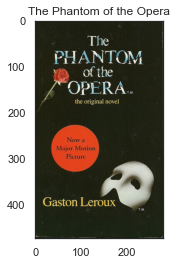

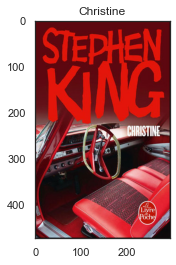

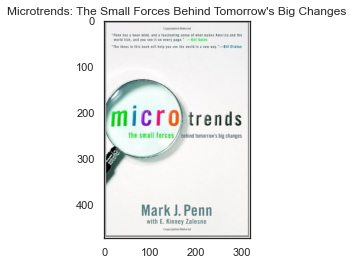

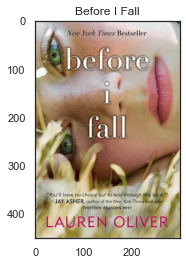

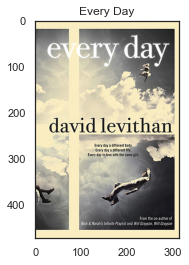

In [245]:
recomendaciones('Before I Go to Sleep')

### imágenes

In [214]:
libros.columns

Index(['Unnamed: 0', 'Desc', 'Unnamed: 0.1', 'author', 'genre', 'image_link',
       'rating', 'title'],
      dtype='object')

In [235]:
recomendaciones("The Da Vinci Code")

1286                 The Lost Symbol
1582                          Origin
1216                 Angels & Demons
719                          Mastery
2031    The Invention of Hugo Cabret
1343                         Inferno
1422                   The Historian
1770     The Hunchback of Notre-Dame
1525                           Choke
2257          Perdido Street Station
Name: title, dtype: object